In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
dataset = pd.read_csv('titanic.csv')

In [44]:
dataset.Age = dataset.Age.fillna(dataset.Age.mean())

In [45]:
dataset.Embarked = dataset.Embarked.fillna(dataset.Embarked.mode()[0])

In [46]:
X = dataset.iloc [:,[2,4,5,6,7,9,11]].values
y = dataset.iloc [:,1].values

In [47]:
from sklearn.preprocessing import LabelEncoder
X_labelencoder_sex = LabelEncoder()
X[:, 1] = X_labelencoder_sex.fit_transform(X[:, 1])

In [48]:
from sklearn.preprocessing import LabelEncoder
X_labelencoder_embarked = LabelEncoder()
X[:, 6] = X_labelencoder_embarked.fit_transform(X[:, 6])

In [49]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [50]:
X_train.shape , X_test.shape , y_train.shape ,y_test.shape

((668, 7), (223, 7), (668,), (223,))

In [36]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [37]:
y_pred = clf.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[98, 12],
       [21, 48]])

In [39]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.815642458101
Precision: 0.8
Recall: 0.695652173913


In [40]:
y_pred_proba = clf.predict_proba(X_test)[:,1]
y_pred_proba

array([ 0.2       ,  0.31666667,  0.        ,  1.        ,  0.1       ,
        0.45      ,  1.        ,  0.7       ,  0.7       ,  0.8       ,
        0.3       ,  0.6       ,  0.16155844,  1.        ,  1.        ,
        0.5       ,  0.        ,  0.2       ,  0.        ,  0.7       ,
        0.24333333,  0.6       ,  0.        ,  0.35      ,  0.1       ,
        1.        ,  0.30833333,  0.6       ,  0.85      ,  0.1       ,
        0.        ,  0.7       ,  0.4       ,  0.1       ,  0.1       ,
        0.1       ,  0.        ,  0.1       ,  0.        ,  0.        ,
        0.4       ,  0.5       ,  0.1       ,  0.        ,  1.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.3       ,
        0.45      ,  0.2       ,  0.7       ,  0.        ,  0.1       ,
        0.        ,  0.1       ,  0.        ,  0.1       ,  0.1       ,
        0.6       ,  0.8       ,  1.        ,  0.1       ,  0.7       ,
        0.13246753,  0.9       ,  0.1       ,  0.8       ,  0.9 

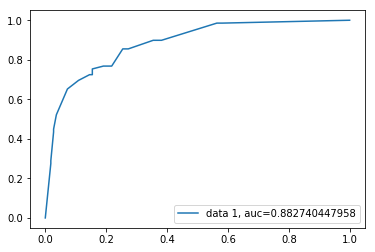

In [41]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [16]:
from sklearn.tree import export_graphviz
import graphviz

In [26]:
!pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-cp35-none-any.whl size=25392 sha256=9d7dca72f83d25c9a519104f0ca2995b9545afed8042a7ecaae28f78f0aff8dc
  Stored in directory: C:\Users\SANDEEP\AppData\Local\pip\Cache\wheels\35\7b\ab\66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


In [27]:
import pydotplus

In [32]:
len(clf.estimators_)

10

In [30]:
dot_data = export_graphviz(clf.estimators_[0])# out_file=None, 
#                      feature_names=X,  
#                      class_names=y,  
#                      filled=True, rounded=True)  
# graph = graphviz.Source(dot_data)  
dot_data
# graph = pydotplus.graphviz.graph_from_dot_data(dot_data)
# graph

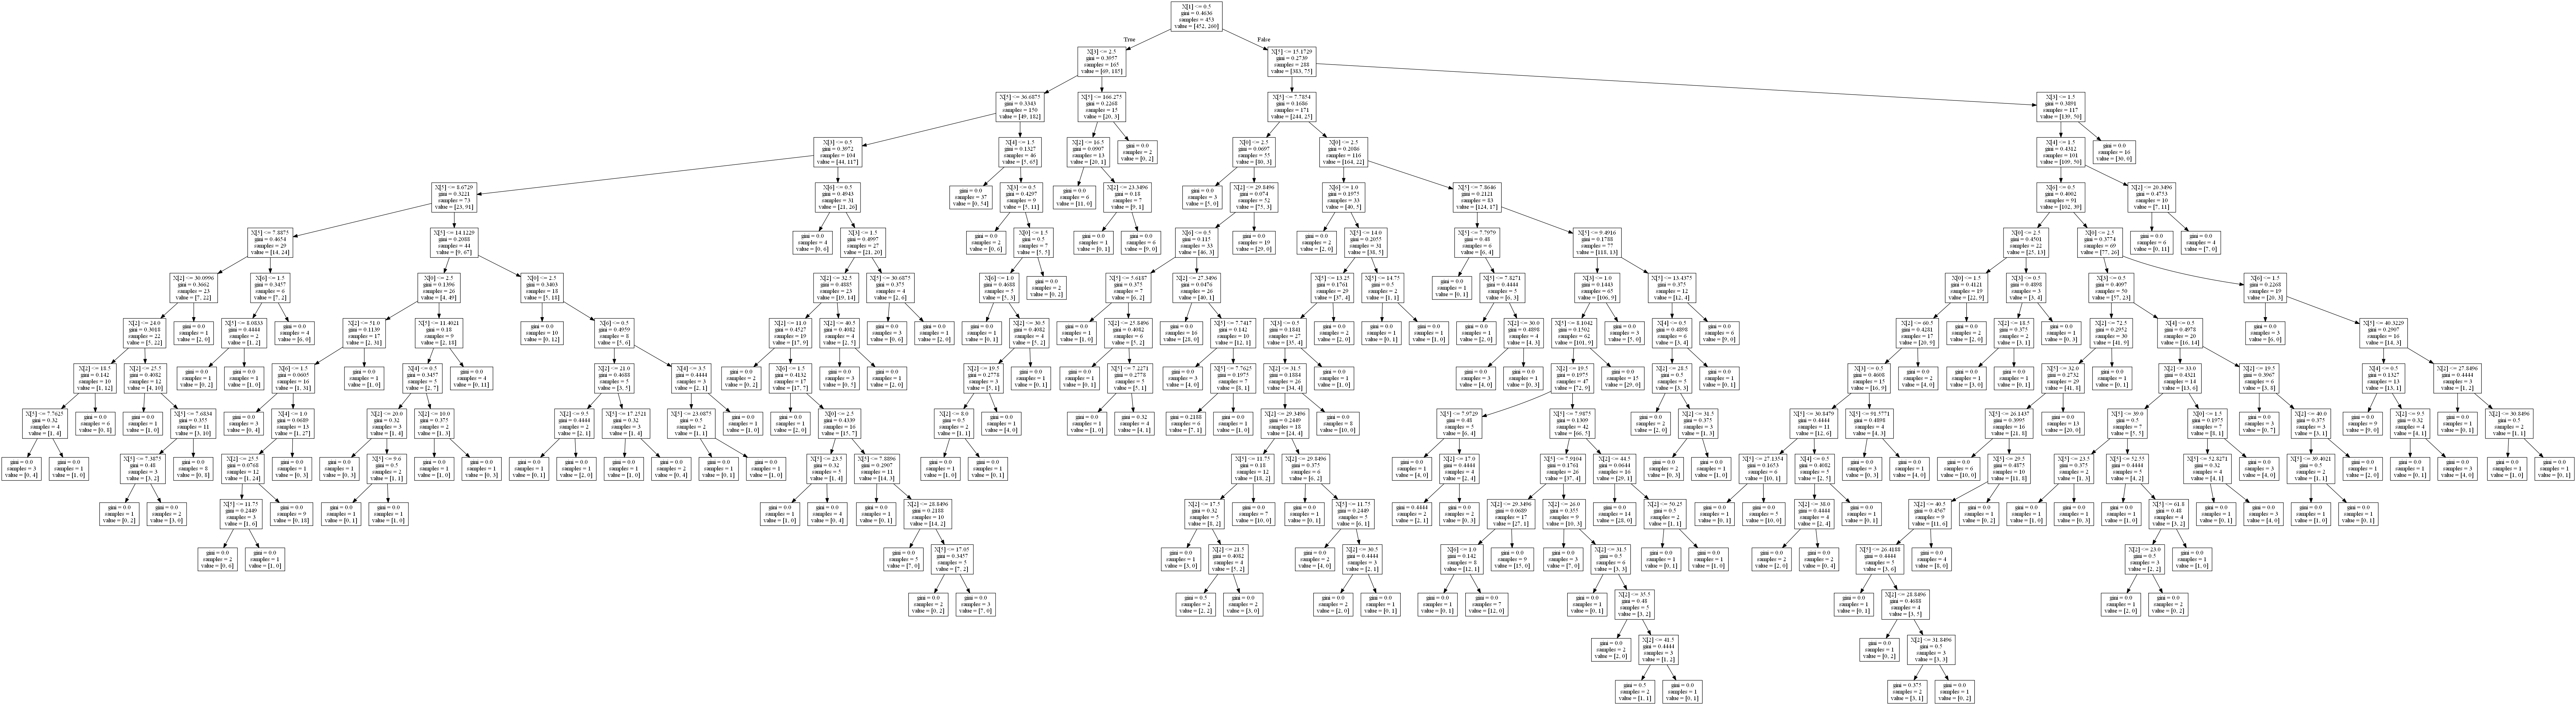

In [43]:
import io
from sklearn import tree

# Let's give dot_data some space so it will not feel nervous any more
dot_data = io.StringIO()
tree.export_graphviz(clf.estimators_[1], out_file=dot_data)
import pydotplus
from IPython.display import Image


graph = pydotplus.graphviz.graph_from_dot_data(dot_data.getvalue())
# make sure you have graphviz installed and set in path
Image(graph.create_png())
graph

In [ ]:
import os
from sklearn.tree import export_graphviz
import six
import pydot
from sklearn import tree
dotfile = six.StringIO()
i_tree = 0
for tree_in_forest in clf.estimators_:
    export_graphviz(tree_in_forest,out_file='tree.dot',
    feature_names=X,
    filled=True,
    rounded=True)
    (graph,) = pydot.graph_from_dot_file('tree.dot')
    name = 'tree' + str(i_tree)
    graph.write_png(name+  '.png')
    os.system('dot -Tpng tree.dot -o tree.png')
    i_tree +=1

In [22]:
import os

In [23]:
os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin/"

# Naive Bayes

In [51]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

In [52]:
gnb = GaussianNB()
fit_gnb = gnb.fit(X_train, y_train)

In [53]:
y_pred_gnb = fit_gnb.predict(X_test)

In [54]:
y_pred_gnb

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1], dtype=int64)

In [55]:
cnf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)
cnf_matrix_gnb

array([[109,  30],
       [ 19,  65]])

In [56]:
print("model accuracy:", metrics.accuracy_score(y_test, y_pred_gnb)* 100)

model accuracy: 78.0269058296


In [57]:
print ('Report : ', classification_report(y_test, y_pred_gnb))

Report :               precision    recall  f1-score   support

          0       0.85      0.78      0.82       139
          1       0.68      0.77      0.73        84

avg / total       0.79      0.78      0.78       223

